In [25]:
%store -r df
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

## Pre-processing  
- Remove id, flight
- Target encoding for the categorical variables
- Adjust scale of X variables 


In [26]:
# Remove Columns id, flight
columns_remove = ['flight']
df1 = df.drop(columns = columns_remove)

In [27]:
df1.describe(include = "all")

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,price,duration_sqrt
count,297921,297921,297921,297921,297921,297921,297921,297921.000000,297921.000000,297921.000000
unique,6,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,126954,61156,70389,249467,90714,58677,204792,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.264537,20905.472726,3.310667
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.921956,22727.139983,1.054551
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1105.000000,0.911043
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,4757.000000,2.598076
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,7424.000000,3.342155
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,42521.000000,4.000000


In [28]:
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,price,duration_sqrt
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,0,5953,1.473092
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,5953,1.526434
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,5956,1.473092
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,5955,1.500000
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,0,5955,1.526434
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,6,69265,3.174902
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,6,77105,3.228002
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,6,79099,3.718871
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,6,81585,3.162278


### Target Encoding for Catagorical Variables

In [29]:
# Capturing the categorical variables
cat_cols = list(df1.select_dtypes(include=['object']).columns)
cat_cols.append('days_left_binned')
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 8
Categorical columns:
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left_binned']


Target encoding, also known as likelihood encoding, is a method of encoding categorical features in which each category is replaced with the mean (or median) of the target variable for that category. In other words, we use the target variable to encode the categories of a categorical feature.The advantage of target encoding is that it can capture the relationship between the categorical feature and the target variable in a more precise way than one-hot encoding, especially when the categorical feature has a large number of categories. Target encoding can also reduce the dimensionality of the feature space.

In [7]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn>=0.20.0 in c:\users\limra\anaconda3\lib\site-packages (from category_encoders) (1.2.2)



In [30]:
import category_encoders as ce

# list of categorical column
te = ce.TargetEncoder(cols=cat_cols)

# Target encoding using DataFrame with the target variable
df1 = te.fit_transform(df1, df1['price'])

In [31]:
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,price,duration_sqrt
0,6179.278881,18961.642864,21236.181972,9366.056074,21602.503032,21382.588800,6529.678640,26702.627186,5953,1.473092
1,6179.278881,18961.642864,20407.425541,9366.056074,22219.627083,21382.588800,6529.678640,26702.627186,5953,1.526434
2,4091.072742,18961.642864,20407.425541,9366.056074,15002.050703,21382.588800,6529.678640,26702.627186,5956,1.473092
3,30426.916434,18961.642864,21688.970066,9366.056074,18485.585251,21382.588800,6529.678640,26702.627186,5955,1.500000
4,30426.916434,18961.642864,21688.970066,9366.056074,22219.627083,21382.588800,6529.678640,26702.627186,5955,1.526434
...,...,...,...,...,...,...,...,...,...,...
300148,30426.916434,22111.604383,21688.970066,22914.894150,23127.003483,20512.183646,52518.049072,19091.245075,69265,3.174902
300149,30426.916434,22111.604383,18117.662618,22914.894150,21602.503032,20512.183646,52518.049072,19091.245075,77105,3.228002
300150,30426.916434,22111.604383,20407.425541,22914.894150,21602.503032,20512.183646,52518.049072,19091.245075,79099,3.718871
300151,30426.916434,22111.604383,20407.425541,22914.894150,23127.003483,20512.183646,52518.049072,19091.245075,81585,3.162278


In [32]:
df1.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left_binned    0
price               0
duration_sqrt       0
dtype: int64

In [34]:
#drop target variable 
X_df = df1[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','days_left_binned','duration_sqrt']]

# df1_copy = df1.copy()

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_df)
df_scaled = scaler.transform(X_df)
df_prepared = pd.DataFrame(df_scaled,columns=X_df.columns)

# add back target variable
df_prepared['price'] = df1['price']





In [35]:
df_prepared

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt,price
0,-1.368800,-1.732372,0.198274,-2.491100,0.236474,0.370940,-0.674351,2.375914,-1.742522,5953.0
1,-1.368800,-1.732372,-0.298600,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5953.0
2,-1.562898,-1.732372,-0.298600,-2.491100,-2.002790,0.370940,-0.674351,2.375914,-1.742522,5956.0
3,0.885018,-1.732372,0.469739,-2.491100,-0.820969,0.370940,-0.674351,2.375914,-1.717006,5955.0
4,0.885018,-1.732372,0.469739,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5955.0
...,...,...,...,...,...,...,...,...,...,...
297916,0.885018,1.074924,0.469739,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.128743,55377.0
297917,0.885018,1.074924,-1.671408,0.433789,0.236474,-0.305768,1.482907,-0.743546,-0.078388,55377.0
297918,0.885018,1.074924,-0.298600,0.433789,0.236474,-0.305768,1.482907,-0.743546,0.387089,55377.0
297919,0.885018,1.074924,-0.298600,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.140713,55377.0


In [36]:
df_prepared.isna().sum()

airline                0
source_city            0
departure_time         0
stops                  0
arrival_time           0
destination_city       0
class                  0
days_left_binned       0
duration_sqrt          0
price               2232
dtype: int64

In [38]:
df_prepared.dropna(inplace=True)

In [40]:
df_prepared.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left_binned    0
duration_sqrt       0
price               0
dtype: int64

In [41]:
df_prepared.shape

(295689, 10)

### Correlation Matrix

In [29]:
# Create heatmap of the correlation matrix
#plt.figure(figsize=(20,10))
#df_excluded = df1.drop('days_left', axis = 1 )
#df_excluded = df_excluded.drop('price', axis = 1 )
#df_excluded = df_excluded.drop('duration', axis = 1 )
#sns.heatmap(df_excluded.corr(),annot=True)

KeyError: "['days_left'] not found in axis"

<Figure size 1440x720 with 0 Axes>

In [36]:
# def correlation(dataset,threshold):
#     col_corr=set()
#     corr_matrix=dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j])>threshold:
#                 colname=corr_matrix.columns[i]
#                 col_corr.add(colname)
#     return col_corr

In [37]:
# corr_features=correlation(df1,0.7)
# len(set(corr_features))

1

array([[<AxesSubplot:title={'center':'airline'}>,
        <AxesSubplot:title={'center':'source_city'}>,
        <AxesSubplot:title={'center':'departure_time'}>,
        <AxesSubplot:title={'center':'stops'}>],
       [<AxesSubplot:title={'center':'arrival_time'}>,
        <AxesSubplot:title={'center':'destination_city'}>,
        <AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'days_left_binned'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'duration_sqrt'}>,
        <AxesSubplot:title={'center':'airline_scaled'}>,
        <AxesSubplot:title={'center':'source_city_scaled'}>],
       [<AxesSubplot:title={'center':'departure_time_scaled'}>,
        <AxesSubplot:title={'center':'stops_scaled'}>,
        <AxesSubplot:title={'center':'arrival_time_scaled'}>,
        <AxesSubplot:title={'center':'destination_city_scaled'}>],
       [<AxesSubplot:title={'center':'class_scaled'}>,
        <AxesSubplot:title={'center':'days

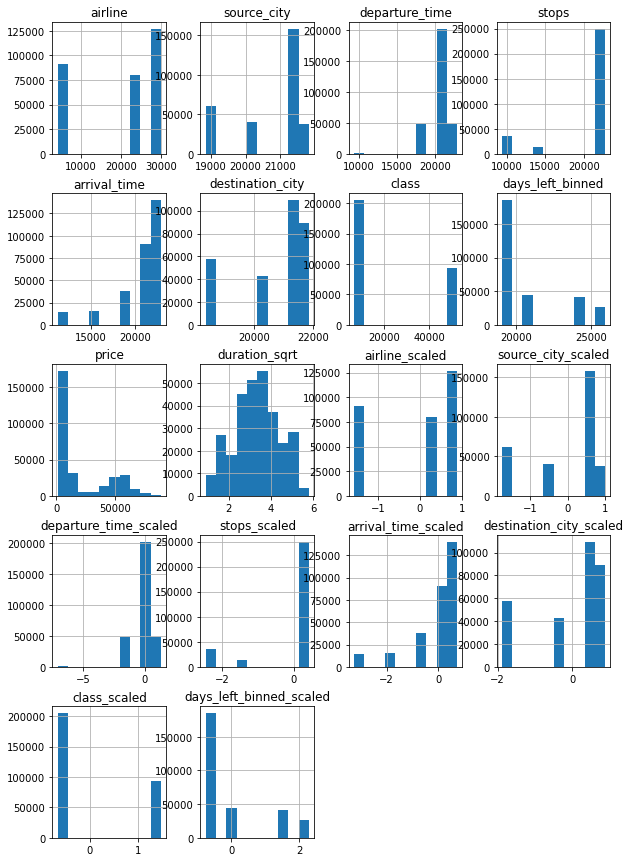

In [67]:
# df1.hist(figsize=(10,15))

array([[<AxesSubplot:title={'center':'airline'}>,
        <AxesSubplot:title={'center':'source_city'}>,
        <AxesSubplot:title={'center':'departure_time'}>],
       [<AxesSubplot:title={'center':'stops'}>,
        <AxesSubplot:title={'center':'arrival_time'}>,
        <AxesSubplot:title={'center':'destination_city'}>],
       [<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'days_left_binned'}>,
        <AxesSubplot:title={'center':'duration_sqrt'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

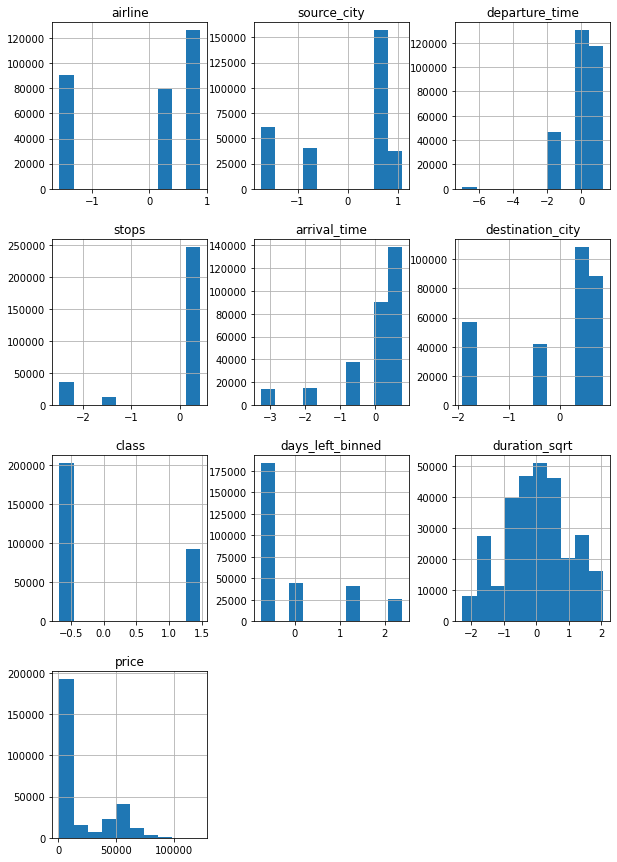

In [42]:
df_prepared.hist(figsize=(10,15))

In [39]:
# corr_features

{'price_boxcox_scaled'}

In [68]:
#df1 = df1.drop("duration", axis=1)
#df1 = df1.drop("days_left", axis=1)
#df1 = df1.drop("price", axis=1)
# df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,price,duration_sqrt,airline_scaled,source_city_scaled,departure_time_scaled,stops_scaled,arrival_time_scaled,destination_city_scaled,class_scaled,days_left_binned_scaled
0,6179.278881,18848.839462,21071.224218,9375.938535,21415.748323,21203.975364,6557.26419,25970.541069,5953.0,1.473092,-1.373055,-1.759965,0.194831,-2.472231,0.229100,0.356926,-0.671276,2.290229
1,6179.278881,18848.839462,20306.632137,9375.938535,22089.654118,21203.975364,6557.26419,25970.541069,5953.0,1.526434,-1.373055,-1.759965,-0.275205,-2.472231,0.462514,0.356926,-0.671276,2.290229
2,4091.072742,18848.839462,20306.632137,9375.938535,14927.654508,21203.975364,6557.26419,25970.541069,5956.0,1.473092,-1.569777,-1.759965,-0.275205,-2.472231,-2.018116,0.356926,-0.671276,2.290229
3,30096.507227,18848.839462,21431.273959,9375.938535,18441.272212,21203.975364,6557.26419,25970.541069,5955.0,1.500000,0.880093,-1.759965,0.416174,-2.472231,-0.801140,0.356926,-0.671276,2.290229
4,30096.507227,18848.839462,21431.273959,9375.938535,22089.654118,21203.975364,6557.26419,25970.541069,5955.0,1.526434,0.880093,-1.759965,0.416174,-2.472231,0.462514,0.356926,-0.671276,2.290229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266833,1.003130,0.416174,0.436584,0.462514,0.820028,1.489701,-0.625552
296404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266833,1.003130,0.194831,0.436584,0.740906,0.820028,1.489701,-0.625552
296454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880093,1.003130,1.332737,0.436584,0.462514,0.820028,1.489701,-0.755786
296773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880093,1.003130,0.416174,0.436584,0.740906,-0.389281,1.489701,2.290229


In [54]:
# df1.isna().sum()

price                      1309
duration_sqrt              1309
airline_scaled             1309
source_city_scaled         1309
departure_time_scaled      1309
stops_scaled               1309
arrival_time_scaled        1309
destination_city_scaled    1309
class_scaled               1309
days_left_binned_scaled    1309
dtype: int64

In [43]:
#to be used acrossed all notebooks
%store df_prepared

Stored 'df_prepared' (DataFrame)


In [44]:
df_prepared.to_csv("C:\\Users\\limra\\IS460\\data\\df_prepared.csv")